In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib as plt


data =  pd.read_excel('/content/drive/MyDrive/credit_rating.xls',)
df = pd.DataFrame(data, columns=[col for col in data.columns if col != 'S.No' and col!='S.No.'])

df

,CHK_ACCT,Duration,History,Purpose of credit,Credit Amount,Balance in Savings A/C,Employment,Install_rate,Marital status,Co-applicant,...,Real Estate,Age,Other installment,Residence,Num_Credits,Job,No. dependents,Phone,Foreign,Credit classification
0,0DM,6,critical,radio-tv,1169,unknown,over-seven,4,single-male,none,...,real-estate,67,none,own,2,skilled,1,no,yes,good.
1,less-200DM,48,duly-till-now,radio-tv,5951,less100DM,four-years,2,female-divorced,none,...,real-estate,22,none,own,1,skilled,1,yes,yes,bad.
2,no-account,12,critical,education,2096,less100DM,seven-years,2,single-male,none,...,real-estate,49,none,own,1,unskilled-resident,2,yes,yes,good.
3,0DM,42,duly-till-now,furniture,7882,less100DM,seven-years,2,single-male,guarantor,...,building-society,45,none,free,1,skilled,2,yes,yes,good.
4,0DM,24,delay,new-car,4870,less100DM,four-years,3,single-male,none,...,none,53,none,free,2,skilled,2,yes,yes,bad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no-account,12,duly-till-now,furniture,1736,less100DM,seven-years,3,female-divorced,none,...,real-estate,31,none,own,1,unskilled-resident,1,yes,yes,good.
996,0DM,30,duly-till-now,used-car,3857,less100DM,four-years,4,male-divorced,none,...,building-society,40,none,own,1,management,1,no,yes,good.
997,no-account,12,duly-till-now,radio-tv,804,less100DM,over-seven,4,single-male,none,...,car,38,none,own,1,skilled,1,yes,yes,good.
998,0DM,45,duly-till-now,radio-tv,1845,less100DM,four-years,4,single-male,none,...,none,23,none,free,1,skilled,1,no,yes,bad.


In [ ]:
df.isnull().sum()

CHK_ACCT                  0
Duration                  0
History                   0
Purpose of credit         0
Credit Amount             0
Balance in Savings A/C    0
Employment                0
Install_rate              0
Marital status            0
Co-applicant              0
Present Resident          0
Real Estate               0
Age                       0
Other installment         0
Residence                 0
Num_Credits               0
Job                       0
No. dependents            0
Phone                     0
Foreign                   0
Credit classification     0
dtype: int64

In [ ]:
for val in df.columns:
  print(val,":",df[val].dtype)

CHK_ACCT : object
Duration : int64
History : object
Purpose of credit : object
Credit Amount : int64
Balance in Savings A/C : object
Employment : object
Install_rate : int64
Marital status : object
Co-applicant : object
Present Resident : int64
Real Estate : object
Age : int64
Other installment : object
Residence : object
Num_Credits : int64
Job : object
No. dependents : int64
Phone : object
Foreign : object
Credit classification : object


In [ ]:
df.columns

Index(['CHK_ACCT', 'Duration', 'History', 'Purpose of credit', 'Credit Amount',
       'Balance in Savings A/C', 'Employment', 'Install_rate',
       'Marital status', 'Co-applicant', 'Present Resident', 'Real Estate',
       'Age', 'Other installment', 'Residence', 'Num_Credits', 'Job',
       'No. dependents', 'Phone', 'Foreign', 'Credit classification'],
      dtype='object')

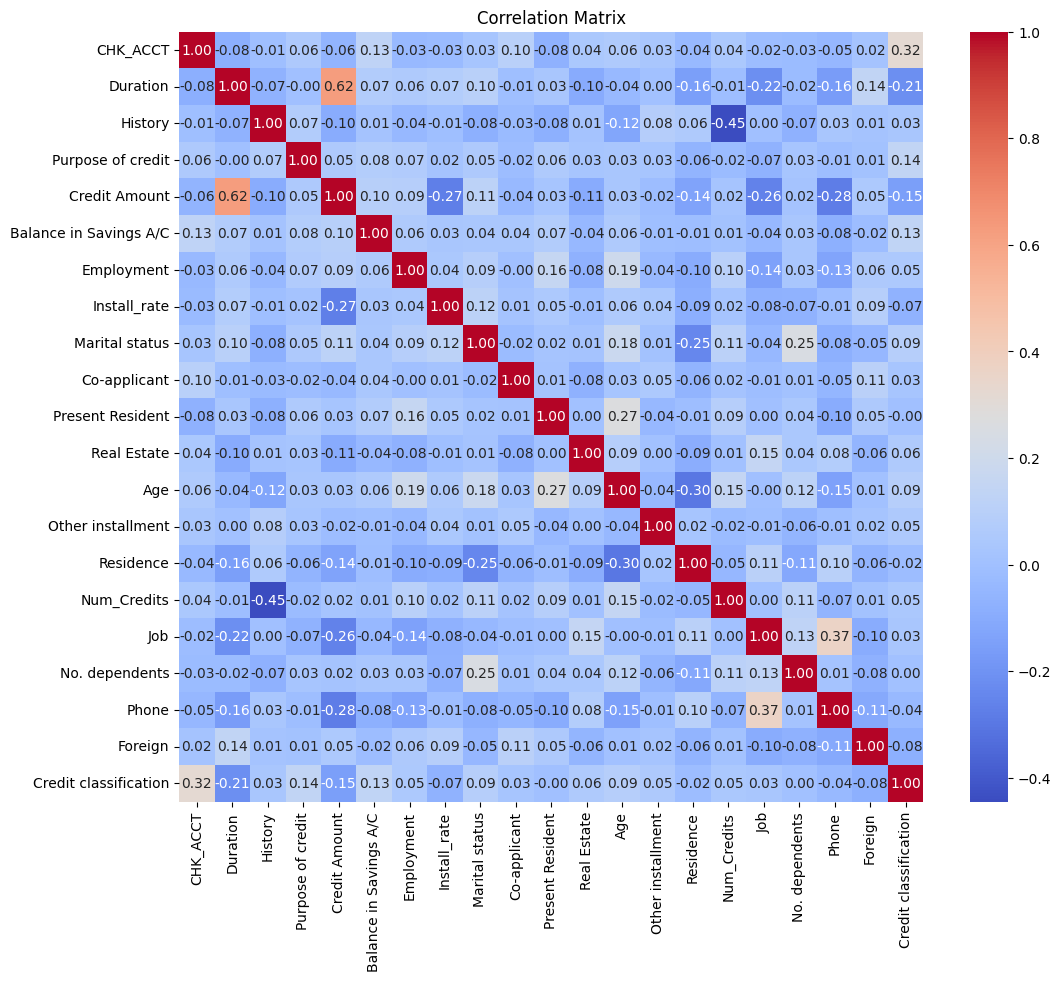

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_encoded = df.copy()


label_encoder = LabelEncoder()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])



correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



In [ ]:
#Assiging Independent and Dependent

X = df_encoded.drop(columns=['Credit classification'])
y = df_encoded['Credit classification']


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Calculate the number of rows and columns for subplots
# num_rows = (len(selected_features) + 2) // 3
# num_cols = min(len(selected_features), 3)

# # Set up the figure with subplots
# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

# # Iterate through each feature and plot a bar plot for each one
# for i, feature in enumerate(selected_features):
#     row = i // num_cols
#     col = i % num_cols
#     sns.countplot(x=feature, hue='Credit classification', data=df_resampled, ax=axes[row, col])
#     axes[row, col].set_title(f"{feature} vs Credit classification")
#     axes[row, col].set_xlabel(feature)
#     axes[row, col].set_ylabel("Count")

# # Adjust layout
# plt.tight_layout()
# plt.show()


In [ ]:
#Feature Selection using SelectKBest, chi2
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=7)


selector.fit_transform(X, y)


selected_indices = selector.get_support(indices=True)


selected_features = X.columns[selected_indices]
selected_features

X_selected=X[selected_features]

In [ ]:
X_selected

,CHK_ACCT,Duration,Purpose of credit,Credit Amount,Balance in Savings A/C,Marital status,Age
0,0,6,6,1169,4,3,67
1,1,48,6,5951,1,0,22
2,2,12,2,2096,1,3,49
3,0,42,3,7882,1,3,45
4,0,24,4,4870,1,3,53
...,...,...,...,...,...,...,...
995,2,12,3,1736,1,0,31
996,0,30,9,3857,1,1,40
997,2,12,6,804,1,3,38
998,0,45,6,1845,1,3,23


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the "Credit Amount" feature
X_selected_scaled = X_selected.copy()
X_selected_scaled[['Credit Amount', 'Age','Duration']] = scaler.fit_transform(X_selected_scaled[['Credit Amount', 'Age','Duration']])
X_selected_scaled

,CHK_ACCT,Duration,Purpose of credit,Credit Amount,Balance in Savings A/C,Marital status,Age
0,0,-1.236478,6,-0.745131,4,3,2.766456
1,1,2.248194,6,0.949817,1,0,-1.191404
2,2,-0.738668,2,-0.416562,1,3,1.183312
3,0,1.750384,3,1.634247,1,3,0.831502
4,0,0.256953,4,0.566664,1,3,1.535122
...,...,...,...,...,...,...,...
995,2,-0.738668,3,-0.544162,1,0,-0.399832
996,0,0.754763,9,0.207612,1,1,0.391740
997,2,-0.738668,6,-0.874503,1,3,0.215835
998,0,1.999289,6,-0.505528,1,3,-1.103451


In [ ]:
from sklearn.decomposition import PCA


X_subset = X.drop(['CHK_ACCT', 'Duration', 'Purpose of credit', 'Credit Amount',
                   'Balance in Savings A/C', 'Marital status', 'Age'], axis=1)

# Initialize PCA
pca = PCA(n_components=8)

# Fit PCA to the subset of features and transform them
X_subset_pca = pca.fit_transform(X_subset)



In [ ]:
X_subset_pca_df=pd.DataFrame(data=X_subset_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8',])
X_subset_pca_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
0,1.122252,1.338070,-1.488256,-0.893736,0.034600,-0.656870,0.013719,0.335750
1,-2.244707,-0.332559,-0.797969,0.618181,0.407519,-0.955884,0.013713,-0.151840
2,0.660193,1.159388,-1.744628,1.625785,0.706313,1.311644,-0.045626,-0.685034
3,1.616015,-1.472604,0.317684,1.166079,-1.162557,0.215319,-0.893872,-0.497298
4,-0.740154,0.871540,-0.448985,-0.480217,-1.172996,-0.764339,-1.187125,0.268153
...,...,...,...,...,...,...,...,...
995,0.630983,-0.479710,-2.678528,0.589055,-0.411689,1.353729,-0.013611,-0.288490
996,-0.259944,-1.011606,1.152658,-1.652794,-1.855904,-1.072334,-0.154222,-0.079993
997,0.847927,-1.095923,-0.417960,-0.959878,-1.003870,0.136396,0.072080,-0.266109
998,-0.873108,-0.325965,-0.805049,-1.484053,-1.294022,-0.843153,-1.045130,-0.326500


In [ ]:
X_pca=pd.concat([X_subset_pca_df,X_selected_scaled],axis=1)
X_pca

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,CHK_ACCT,Duration,Purpose of credit,Credit Amount,Balance in Savings A/C,Marital status,Age
0,1.122252,1.338070,-1.488256,-0.893736,0.034600,-0.656870,0.013719,0.335750,0,-1.236478,6,-0.745131,4,3,2.766456
1,-2.244707,-0.332559,-0.797969,0.618181,0.407519,-0.955884,0.013713,-0.151840,1,2.248194,6,0.949817,1,0,-1.191404
2,0.660193,1.159388,-1.744628,1.625785,0.706313,1.311644,-0.045626,-0.685034,2,-0.738668,2,-0.416562,1,3,1.183312
3,1.616015,-1.472604,0.317684,1.166079,-1.162557,0.215319,-0.893872,-0.497298,0,1.750384,3,1.634247,1,3,0.831502
4,-0.740154,0.871540,-0.448985,-0.480217,-1.172996,-0.764339,-1.187125,0.268153,0,0.256953,4,0.566664,1,3,1.535122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.630983,-0.479710,-2.678528,0.589055,-0.411689,1.353729,-0.013611,-0.288490,2,-0.738668,3,-0.544162,1,0,-0.399832
996,-0.259944,-1.011606,1.152658,-1.652794,-1.855904,-1.072334,-0.154222,-0.079993,0,0.754763,9,0.207612,1,1,0.391740
997,0.847927,-1.095923,-0.417960,-0.959878,-1.003870,0.136396,0.072080,-0.266109,2,-0.738668,6,-0.874503,1,3,0.215835
998,-0.873108,-0.325965,-0.805049,-1.484053,-1.294022,-0.843153,-1.045130,-0.326500,0,1.999289,6,-0.505528,1,3,-1.103451


In [ ]:
pca.explained_variance_ratio_.sum()

0.9210324723427392

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Perform random oversampling
oversampler = RandomOverSampler(random_state=1000)
X_resampled, y_resampled = oversampler.fit_resample(X_pca, y)


In [ ]:
# best_acc=0
# best_random=0
# for i in range(1001):

#   X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=i)


#   test = XGBClassifier(random_state=200, scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1))


#   test.fit(X_train, y_train)

#   test_pred = test.score(X_test, y_test)

#   if(test_pred > best_acc):
#     best_acc=test_pred
#     best_random=i

# print("best acc:",best_acc)
# print("best rand",best_random)


In [ ]:
import numpy as np
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=837)

model=XGBClassifier(random_state=200, scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1))

model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=200, ...)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.99      0.95       140
           1       0.99      0.89      0.94       140

    accuracy                           0.94       280
   macro avg       0.95      0.94      0.94       280
weighted avg       0.95      0.94      0.94       280



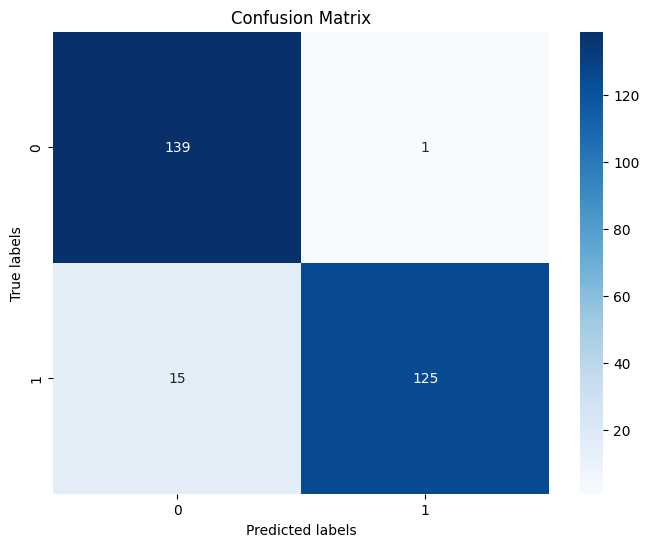

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
import pickle

with open('/content/drive/My Drive/Best_Card.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
import pickle
with open('/content/drive/My Drive/Best_Card.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

